imprace - Importance of Race
imprelig - importance of religion
field - field of study
dec - if the person likes the partner

df['goal'] = df.goal.map({1: 'Fun', 2: 'Meet', 3: 'Date', 
                          4: 'Relationship', 5: 'IdidIt', 6: 'Other'})

df['go_out'] = df.go_out.map({1: 'Several_pw', 2: 'Twice_pw', 3: 'Once_pw',
                             4: 'Twice_pm', 5: 'Once_pm', 6: 'Several_py',
                             7: 'Almost_never'}).fillna(df.go_out)


exphappy - how happy expected to be about the meeting (DROP)

expnum - how many yes's they expect to recieve out of 20

1_1 what you look for in the opposite sex

3_1 what the person scores themself

5_1 what you think other people would score you

values without 1_1 are the persons rating of the partner (like, amb, shar, prob)


drop: tuition, undergra, mn_sat, field_cd, zipcode, career_c, 2_1, 4_1, pf_o, int_corr, _2, odg, condtn, wave, round, position, order, partner

In [42]:
# Re-importing necessary libraries and reloading the dataset since the code execution state was reset
import pandas as pd

# Reload the speed dating dataset
file_path = 'Speed Dating Data.csv'
speed_dating_data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Specified columns to be dropped
columns_to_drop = ['tuition', 'id', 'undergra', 'mn_sat', 'field_cd', 'zipcode', 'career_c', 'odg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'samerace', 'partner', 'int_corr', 'you_call', 'them_cal', 'idg', 'positin1' , 'age_o', 'race_o', 'match_es' , 'field_cd', 'career_c', 'undergra', 'mn_sat', 'tuition','length', 'dec', 'you_call', 'them_cal', 'date_3', 'prob', 'met']

# Dropping columns that end with specific patterns and columns that start with 'pf_o'
columns_to_drop += [col for col in speed_dating_data.columns if col.endswith('2_1') or col.endswith('4_1') or col.endswith('_o') or col.endswith('5_3') or col.endswith('3_3') or col.endswith('2_3') or col.endswith('4_3') or col.endswith('7_3') or col.endswith('1_3') or col.endswith('_3') or col.endswith('_2') or col.endswith('_s') or col.endswith('5_1')]
columns_to_drop += [col for col in speed_dating_data.columns if col.startswith('pf_o')]

# Drop the columns from the dataframe
speed_dating_data_cleaned = speed_dating_data.drop(columns=columns_to_drop, errors='ignore')  # 'errors=ignore' to ignore any columns not found
independent_dating_data = speed_dating_data_cleaned.drop(columns=['attr','sinc','intel','fun','amb','shar','like'])  # Drop the target column 'match' to get the independent features

# Display the shape of the original and cleaned dataframe as a confirmation of the operation
original_shape = speed_dating_data.shape
cleaned_shape = speed_dating_data_cleaned.shape

original_shape, cleaned_shape

speed_dating_data_cleaned.head()


,iid,gender,pid,match,age,field,race,imprace,imprelig,from,...,fun3_1,intel3_1,amb3_1,attr,sinc,intel,fun,amb,shar,like
0,1,0,11.0,0,21.0,Law,4.0,2.0,4.0,Chicago,...,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,7.0
1,1,0,12.0,0,21.0,Law,4.0,2.0,4.0,Chicago,...,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,7.0
2,1,0,13.0,1,21.0,Law,4.0,2.0,4.0,Chicago,...,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,7.0,7.0
3,1,0,14.0,1,21.0,Law,4.0,2.0,4.0,Chicago,...,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,7.0
4,1,0,15.0,1,21.0,Law,4.0,2.0,4.0,Chicago,...,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0


In [43]:
# Merge the DataFrame with itself
# 'left_on' is the participant's 'iid' (their unique identifier)
# 'right_on' is the partner's 'pid' (indicating the partner's unique identifier in the other row)
paired_data = pd.merge(speed_dating_data_cleaned,speed_dating_data_cleaned, left_on=['iid', 'pid'], right_on=['pid', 'iid'], suffixes=('', '_p'))
ind_paired_data = pd.merge(independent_dating_data,independent_dating_data, left_on=['iid', 'pid'], right_on=['pid', 'iid'], suffixes=('', '_p'))


# Now, paired_data contains each participant's information along with their partner's
# Participant data retains original column names, while partner data columns have '_p' suffix

# Display the shape of the paired data and the first few rows to verify the structure
print(paired_data.shape)
paired_data.head()

(8368, 104)


,iid,gender,pid,match,age,field,race,imprace,imprelig,from,...,fun3_1_p,intel3_1_p,amb3_1_p,attr_p,sinc_p,intel_p,fun_p,amb_p,shar_p,like_p
0,1,0,11.0,0,21.0,Law,4.0,2.0,4.0,Chicago,...,7.0,8.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,7.0
1,1,0,12.0,0,21.0,Law,4.0,2.0,4.0,Chicago,...,9.0,10.0,9.0,7.0,8.0,10.0,7.0,7.0,5.0,8.0
2,1,0,13.0,1,21.0,Law,4.0,2.0,4.0,Chicago,...,8.0,8.0,3.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1,0,14.0,1,21.0,Law,4.0,2.0,4.0,Chicago,...,9.0,9.0,9.0,7.0,8.0,9.0,8.0,9.0,8.0,7.0
4,1,0,15.0,1,21.0,Law,4.0,2.0,4.0,Chicago,...,7.0,9.0,9.0,8.0,7.0,9.0,6.0,9.0,7.0,8.0


The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The curve and the area of 0.62 indicate that the model has modest discrimination capacity, with significant room for improvement in predicting matches more accurately. 

In [44]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Identify categorical variables
categorical_columns = paired_data.select_dtypes(include=['object']).columns
ind_categorical_columns = ind_paired_data.select_dtypes(include=['object']).columns

# Encode categorical variables using one-hot encoding
paired_data_encoded = pd.get_dummies(paired_data, columns=categorical_columns)
ind_paired_data_encoded = pd.get_dummies(ind_paired_data, columns=ind_categorical_columns)

# Drop any remaining non-numeric columns
paired_data_numeric = paired_data_encoded.select_dtypes(include=['number'])
ind_paired_data_numeric = ind_paired_data_encoded.select_dtypes(include=['number'])

Test Accuracy: 0.8375149342891278


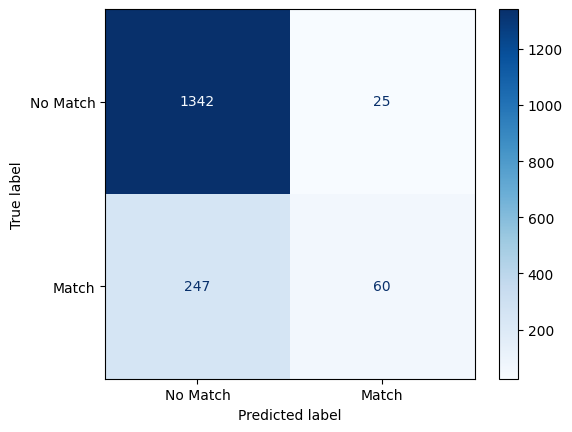

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

# Load the dataset (Assuming 'paired_data' is already defined)
# Assuming 'paired_data' is your DataFrame containing the dataset

# Handle missing values
imputer = SimpleImputer(strategy='mean')
paired_data_imputed = pd.DataFrame(imputer.fit_transform(paired_data_numeric), columns=paired_data_numeric.columns)

# Split the data into features and target variable
X = paired_data_imputed.drop(columns=['match', 'match_p'])
y = paired_data_imputed['match']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=40, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['No Match', 'Match']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')


In [ ]:
# Handle missing values
ind_paired_data_imputed = pd.DataFrame(imputer.fit_transform(ind_paired_data_numeric), columns=ind_paired_data_numeric.columns)

# Split the data into features and target variable
X = ind_paired_data_imputed.drop(columns=['match', 'match_p'])
y = ind_paired_data_imputed['match']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
ind_rf_model = RandomForestClassifier(n_estimators=1000, max_depth=40, random_state=42)
ind_rf_model.fit(X_train, y_train)

# Make predictions on the test set
ind_y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['No Match', 'Match']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')


In [46]:
# Save the DataFrame to a CSV file
paired_data_imputed.to_csv('paired_data_imputed.csv', index=False)  # Replace 'paired_data_imputed.csv' with your desired file path

# Alternatively, you can save to other formats like Excel
# paired_data_imputed.to_excel('paired_data_imputed.xlsx', index=False)

# Now you can download the file 'paired_data_imputed.csv' from your file system

ind_paired_data_imputed.to_csv('ind_paired_data_imputed.csv', index=False)  # Replace 'paired_data_imputed.csv' with your desired file path

